In [47]:
import os

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt

import sklearn.model_selection

import sagemaker
from sagemaker import get_execution_role
from sagemaker.amazon.amazon_estimator import get_image_uri
from sagemaker.predictor import csv_serializer

In [48]:
session = sagemaker.Session()  #Sagemaker Necessities, can be ignored
role = get_execution_role()    #Sagemaker Necessities, can be ignored

In [49]:
df=pd.read_csv('parkinsons_updrs.data')      # Reading the dataset and dropping a column that serves no purpose
df.head(20)

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
5,1,72,0,40.6520,29.435,36.870,0.00353,0.000023,0.00119,0.00159,...,0.214,0.01006,0.01337,0.02263,0.03019,0.009438,22.946,0.53949,0.57243,0.19500
6,1,72,0,47.6490,29.682,37.363,0.00422,0.000024,0.00212,0.00221,...,0.445,0.02376,0.02621,0.03488,0.07128,0.013260,22.506,0.49250,0.54779,0.17563
7,1,72,0,54.6400,29.928,37.857,0.00476,0.000025,0.00226,0.00259,...,0.212,0.00979,0.01462,0.01911,0.02937,0.027969,22.929,0.47712,0.54234,0.23844
8,1,72,0,61.6690,30.177,38.353,0.00432,0.000029,0.00156,0.00207,...,0.371,0.01774,0.02134,0.03451,0.05323,0.013381,22.078,0.51563,0.61864,0.20037
9,1,72,0,68.6880,30.424,38.849,0.00496,0.000027,0.00258,0.00253,...,0.310,0.02030,0.01970,0.02569,0.06089,0.018021,22.606,0.50032,0.58673,0.20117


In [50]:
df=pd.read_csv('parkinsons_updrs.data')      # Reading the dataset and dropping a column that serves no purpose
df= df.drop(['subject#'], axis=1)
df


,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,0.00500,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,0.00358,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,0.00456,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,0.00383,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


In [51]:
df= df.sample(frac=1).reset_index(drop=True)
df

,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,75,0,55.344,29.824,32.388,0.01278,0.000104,0.00529,0.00708,0.01586,...,0.701,0.03545,0.04699,0.06113,0.10635,0.037094,15.475,0.60304,0.81236,0.44477
1,66,1,114.410,26.980,31.974,0.00510,0.000021,0.00240,0.00278,0.00720,...,0.371,0.02233,0.02524,0.03298,0.06700,0.035159,16.805,0.59599,0.58504,0.25483
2,62,1,126.320,24.412,32.000,0.00425,0.000047,0.00176,0.00267,0.00527,...,0.972,0.04098,0.06143,0.09733,0.12293,0.183380,10.086,0.70061,0.56186,0.21591
3,78,0,149.370,23.888,31.107,0.00189,0.000013,0.00079,0.00120,0.00237,...,0.146,0.00751,0.01002,0.01811,0.02253,0.005335,24.178,0.40528,0.64744,0.11933
4,74,1,118.300,28.366,32.648,0.00511,0.000025,0.00271,0.00278,0.00813,...,0.223,0.01310,0.01446,0.02051,0.03930,0.013215,20.487,0.60768,0.69078,0.20731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,73,0,39.712,26.784,38.569,0.00360,0.000030,0.00188,0.00213,0.00564,...,0.423,0.02545,0.03036,0.03980,0.07635,0.011389,21.552,0.55854,0.66175,0.17892
5871,68,0,105.360,17.607,25.243,0.00900,0.000066,0.00508,0.00436,0.01524,...,0.134,0.00679,0.00870,0.01235,0.02037,0.023231,21.024,0.57029,0.71079,0.26877
5872,59,1,177.510,12.160,26.107,0.00305,0.000016,0.00154,0.00175,0.00461,...,0.228,0.01253,0.01565,0.01815,0.03760,0.015669,23.866,0.42954,0.64831,0.11827
5873,59,0,17.578,27.455,33.227,0.00334,0.000033,0.00167,0.00192,0.00502,...,0.129,0.00719,0.00883,0.01425,0.02157,0.005541,24.307,0.54678,0.77564,0.14520


In [52]:
df.columns.values  # Just getting an idea of the column titles we have

array(['age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5',
       'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3',
       'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR',
       'RPDE', 'DFA', 'PPE'], dtype=object)

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

dfs=pd.DataFrame(scaler.fit_transform(df.astype(float)))#Applying standardization to our dataset
dfs.columns=df.columns.values   #Making sure we add back the previous column names

labels=dfs.loc[:,'total_UPDRS'].values    #Giving the object 'labels' the classification of each sample ( 1 or 0)
data= dfs.drop(['total_UPDRS'], axis=1)   #retreiving the dataset, dropping the Y-value, to only have features
data=data.values

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(data, labels, test_size=0.33)
X_train, X_val, Y_train, Y_val = sklearn.model_selection.train_test_split(X_train, Y_train, test_size=0.33)

In [54]:
data_dir = '../data/training_files'      #We are making sure the pathway we will add training,valid, and testing files exist
if not os.path.exists(data_dir):
    os.makedirs(data_dir)


In [55]:
X_train= pd.DataFrame(X_train)
X_val= pd.DataFrame(X_val)
X_test= pd.DataFrame(X_test)
    #Seperating the dataset into X and Y variables for their specific type (train, validation, testing)
Y_train= pd.DataFrame(Y_train)
Y_val= pd.DataFrame(Y_val)
Y_test= pd.DataFrame(Y_test)

In [56]:
X_test.to_csv(os.path.join(data_dir, 'test.csv'), header=False, index=False)

#Here we prepare our data to the files we specified, in S3, this is sagemaker specific, it can be ignored

pd.concat([Y_train, X_train], axis=1).to_csv(os.path.join(data_dir, 'train.csv'), header=False, index=False)
pd.concat([Y_val, X_val], axis=1).to_csv(os.path.join(data_dir, 'validation.csv'), header=False, index=False)

In [57]:
prefix = 'xgboost-parkinsons-telemonitoring-model'

#Here we upload our data to the files we specified, in S3, this is sagemaker specific, it can be ignored


test_location = session.upload_data(os.path.join(data_dir, 'test.csv'), key_prefix=prefix)
val_location = session.upload_data(os.path.join(data_dir, 'validation.csv'), key_prefix=prefix)
train_location = session.upload_data(os.path.join(data_dir, 'train.csv'), key_prefix=prefix)

In [58]:
# we use this utility method to construct the image name for the training container. This can be ignored
container = get_image_uri(session.boto_region_name, 'xgboost')

# Now that we know which container to use, we can construct the estimator object.Can be ignored

xgb = sagemaker.estimator.Estimator(container, # The name of the training container
                                    role,      # The IAM role to use (our current role in this case)
                                    train_instance_count=1, # The number of instances to use for training
                                    train_instance_type='ml.m4.xlarge', # The type of instance ot use for training
                                    output_path='s3://{}/{}/output'.format(session.default_bucket(), prefix),
                                                                        # Where to save the output (the model artifacts)
                                    sagemaker_session=session) # The current SageMaker session

	get_image_uri(region, 'xgboost', '1.0-1').


In [59]:
#Here we have our hyperparameters, which are extremely similar to the solution code that got 94% accuracy

xgb.set_hyperparameters(max_depth=3,
                        eta=0.2,
                        gamma=0,
                        min_child_weight=1,
                        subsample=1,
                        objective='reg:linear',
                        early_stopping_rounds=10,
                        num_round=300)

In [60]:
#This is the location of our training and validation set
s3_input_train = sagemaker.s3_input(s3_data=train_location, content_type='csv')
s3_input_validation = sagemaker.s3_input(s3_data=val_location, content_type='csv')

#Here we fit our model to the training and validation sets
xgb.fit({'train': s3_input_train, 'validation': s3_input_validation})

2020-07-17 00:42:20 Starting - Starting the training job...
2020-07-17 00:42:22 Starting - Launching requested ML instances......
2020-07-17 00:43:30 Starting - Preparing the instances for training......
2020-07-17 00:44:40 Downloading - Downloading input data
2020-07-17 00:44:40 Training - Downloading the training image..Arguments: train
[2020-07-17:00:45:00:INFO] Running standalone xgboost training.
[2020-07-17:00:45:00:INFO] File size need to be processed in the node: 1.5mb. Available memory size in the node: 8504.05mb
[2020-07-17:00:45:00:INFO] Determined delimiter of CSV input is ','
[00:45:00] S3DistributionType set as FullyReplicated
[00:45:00] 2637x20 matrix with 52740 entries loaded from /opt/ml/input/data/train?format=csv&label_column=0&delimiter=,
[2020-07-17:00:45:00:INFO] Determined delimiter of CSV input is ','
[00:45:00] S3DistributionType set as FullyReplicated
[00:45:00] 1299x20 matrix with 25980 entries loaded from /opt/ml/input/data/validation?format=csv&label_column

In [61]:
#This is sagemaker specific, we are just specifying the training job name for our model
xgb_attached = sagemaker.estimator.Estimator.attach('xgboost-2020-07-17-00-42-20-802')

2020-07-17 00:45:12 Starting - Preparing the instances for training
2020-07-17 00:45:12 Downloading - Downloading input data
2020-07-17 00:45:12 Training - Training image download completed. Training in progress.
2020-07-17 00:45:12 Uploading - Uploading generated training model
2020-07-17 00:45:12 Completed - Training job completedArguments: train
[2020-07-17:00:45:00:INFO] Running standalone xgboost training.
[2020-07-17:00:45:00:INFO] File size need to be processed in the node: 1.5mb. Available memory size in the node: 8504.05mb
[2020-07-17:00:45:00:INFO] Determined delimiter of CSV input is ','
[00:45:00] S3DistributionType set as FullyReplicated
[00:45:00] 2637x20 matrix with 52740 entries loaded from /opt/ml/input/data/train?format=csv&label_column=0&delimiter=,
[2020-07-17:00:45:00:INFO] Determined delimiter of CSV input is ','
[00:45:00] S3DistributionType set as FullyReplicated
[00:45:00] 1299x20 matrix with 25980 entries loaded from /opt/ml/input/data/validation?format=csv&la

In [62]:
xgb_transformer = xgb_attached.transformer(instance_count = 1, instance_type = 'ml.m4.xlarge')
#Making it available for BatchTesting

In [63]:
xgb_transformer.transform(test_location, content_type='text/csv', split_type='Line')
#Now to actually test the model on the test data

In [64]:
xgb_transformer.wait()

........................Arguments: serve
[2020-07-17 00:51:49 +0000] [1] [INFO] Starting gunicorn 19.7.1
[2020-07-17 00:51:49 +0000] [1] [INFO] Listening at: http://0.0.0.0:8080 (1)
[2020-07-17 00:51:49 +0000] [1] [INFO] Using worker: gevent
[2020-07-17 00:51:49 +0000] [36] [INFO] Booting worker with pid: 36
[2020-07-17 00:51:49 +0000] [37] [INFO] Booting worker with pid: 37
[2020-07-17:00:51:49:INFO] Model loaded successfully for worker : 36
[2020-07-17 00:51:49 +0000] [38] [INFO] Booting worker with pid: 38
[2020-07-17:00:51:49:INFO] Model loaded successfully for worker : 37
[2020-07-17 00:51:49 +0000] [39] [INFO] Booting worker with pid: 39
[2020-07-17:00:51:49:INFO] Model loaded successfully for worker : 38
[2020-07-17:00:51:49:INFO] Model loaded successfully for worker : 39
[2020-07-17:00:52:11:INFO] Sniff delimiter as ','
[2020-07-17:00:52:11:INFO] Determined delimiter of CSV input is ','

2020-07-17T00:52:11.090:[sagemaker logs]: MaxConcurrentTransforms=4, MaxPayloadInMB=6, Batc

In [65]:
!aws s3 cp --recursive $xgb_transformer.output_path $data_dir 
# This is just allows us to have access to the predictions file

download: s3://sagemaker-us-east-2-262034113260/xgboost-2020-07-17-00-42-20-802-2020-07-17-00-47-53-651/test.csv.out to ../data/training_files/test.csv.out


In [66]:
#This is the object that holds all of the predictions data
predictions = pd.read_csv(os.path.join(data_dir, 'test.csv.out'), header=None)


Text(0.5, 1.0, 'Median Price vs Predicted Price')

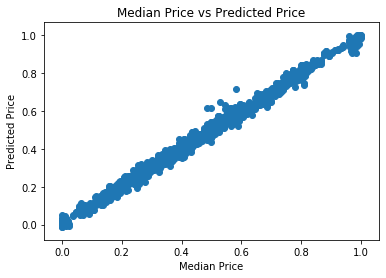

In [67]:
plt.scatter(Y_test, predictions)
plt.xlabel("Median Price")
plt.ylabel("Predicted Price")
plt.title("Median Price vs Predicted Price")